<a href="https://colab.research.google.com/github/xoreo/md/blob/master/Automatic_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic/Algorithmic Differentiation
[Crude Notes](https://github.com/xoreo/md/blob/master/notes.pdf)

Wait can I put $\LaTeX$ in here? Woah! This is so great 
❤️

Some setup code

In [0]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
RANGE = (10, 20)
FUNC = lambda x: np.sin(x)
# FUNC = lambda x: x ** 2 + 4*x + 7

Now we need to calculate the function values to put in our vector.

In [0]:
def calc_func_vector(f, n, r):
  dx = (r[1]-r[0])/n
  x = np.arange(r[0], r[1], dx)
  y = np.array(list(map(f, x)))
  return x, y, dx

Now that we made the vector, we need to construct the differentiation matrix. It will look like this for 

In [0]:
def calc_D():
  D = np.zeros(shape=(N, N)) # Start off blank
  for i in range(len(D) - 1):
    D[i][i] = -1
    D[i][i+1] = 1
  D[N-1][N-2] = -1
  D[N-1][N-1] = 1
  # for i in range(len(D)):
  #   D[i][len(D) - 1] = 1
  #   D[i][len(D) - 2] = -1
  return D

Put it all together

In [0]:
x, v, dx = calc_func_vector(FUNC, N, RANGE)
D  = calc_D()
p  = D.dot(v) / dx
p2 = D.dot(p) / dx
p3 = D.dot(p2) / dx

# print("dx: {}".format(dx))
# print("D:\n%s" % D)
# print("x: {}".format(x))
# print("v: {}".format(v))
# print("p: {}".format(p))

Some analysis

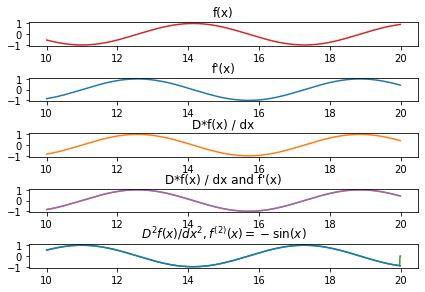

In [0]:
fprime = np.cos(x)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
fig.tight_layout()

ax1.set_title("f(x)")
ax1.plot(x, FUNC(x), 'tab:red')

ax2.set_title("f'(x)")
ax2.plot(x, fprime, 'tab:blue')

ax3.set_title("D*f(x) / dx")
ax3.plot(x, p, 'tab:orange')

ax4.set_title("D*f(x) / dx and f'(x)")
ax4.plot(x, p, 'tab:orange')
ax4.plot(x, fprime, 'tab:purple')

ax5.set_title(r'$D^2f(x) / dx^2, f^{(2)}(x) = -\sin(x)$')
ax5.plot(x, p2, 'tab:green')
ax5.plot(x, -FUNC(x))

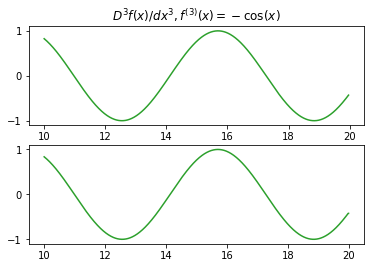

In [0]:
fig, (ax6, ax7) = plt.subplots(2)
ax6.set_title(r'$D^3f(x) / dx^3, f^{(3)}(x) = -\cos(x)$')
ax6.plot(x[1:-3], p3[1:-3], 'tab:green')
# ax6.plot(x, -p)

ax7.plot(x, -p, 'tab:green')


Okay, so basically what I think is happening is you have this $D$, and it is, like you said, just a "mathematical structure" that you can manipulate like anything else. Squaring a matrix is just multiplying it by itself, so, for example,

$$
\begin{pmatrix}
-1 &  1 &  0 & 0 \\
 0 & -1 &  1 & 0 \\
 0 &  0 & -1 & 1 \\
 0 &  0 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
-1 &  1 &  0 & 0 \\
 0 & -1 &  1 & 0 \\
 0 &  0 & -1 & 1 \\
 0 &  0 & -1 & 1
\end{pmatrix}
=
\begin{pmatrix}
-1 & -2 &  1 & 0 \\
 0 &  1 &  -2 & 1 \\
 0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0
\end{pmatrix}
$$
I think that's right? I did it by hand it took a very long time.

So then we
\begin{pmatrix}
-1 & -2 &  1 & 0 \\
 0 &  1 &  -2 & 1 \\
 0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
f_0 \\
 f_1 \\
 f_2 \\
 f_3 
\end{pmatrix}
= 
\begin{pmatrix}
f_0 - 2(f_1) + f_2 \\
 f_1 - 2(f_2) + f_3 \\
 0 \\
 0 
\end{pmatrix}

This doesn't look right



Exactly... but notice that last line... its a repeat... so that edge will give you stranger stuff because we fixed $D$ by hand by making the last row a backward diff... thus when we square that manual fix translates to a non-mathematical change that yields those discontinuities. 

Notice the change I made to the 3rd deriv plot.. when we exclude the last 2 rows... its gucci


Ahhh I see what you mean now.

In [91]:
D**2

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [0]:
D**3

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

Question for tomorrow:
Okay. I see what's happening with the second and third and n-th derivatives. Its so cool how we can just treat our $D$ just like its a regular $\mathrm d$ by squaring it and such. However, (aside from it being much prettier), how is this *better* than numerical differentiation where you just keep some small $\Delta x = 0.0001$ in memory? You are still approximating by the difference between $x_1 - x_0$, which is essentially the same as just some $\Delta x = 0.0001$. I get that this matrix way can be parallelized, but I don't see how it is more precise. Does $N$ just need to be really big?
